In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ColourXY.csv')
df.head(10)

,x,y,color
0,144.475109,101.450265,0
1,370.683312,298.003415,2
2,253.714046,234.079402,1
3,148.699165,78.654006,0
4,192.157973,252.837304,1
5,367.835098,245.519610,2
6,165.116898,242.664560,1
7,171.669334,264.153026,1
8,240.678397,216.594674,1
9,149.782921,102.602913,0


The dataset consists of X and Y values which are clustered into 3 set of colors.
We need to predict the color attribute through k means algo hence we must drop the already existing color attribute.

Create a new point

In [4]:
new_point=[230,219]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12529 entries, 0 to 12528
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       12529 non-null  float64
 1   y       12529 non-null  float64
 2   color   12529 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 293.8 KB


Pre processing is required.
Dropping the color column.
Since there are no NaN or incorrect values there is no need to fill any with mean or other techniques.

In [12]:
x=df.iloc[:,[0,1]].values

In [13]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(x)
print(y_km)

km.cluster_centers_

[2 1 0 ... 2 2 2]


array([[246.43368815, 200.72372251],
       [358.42614972, 277.99458408],
       [140.67810315, 113.20169037]])

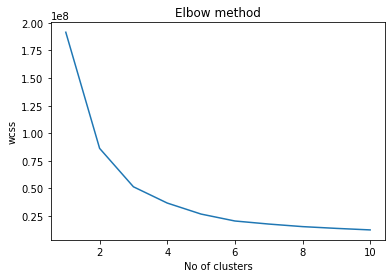

In [ ]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

The point at which elbow shape is created is 3 

WCSS (Within cluster sum of squares) : It is the sum of squared distance between each point and the centroid in a cluster. As the no. of clusters increases the wcss value will start to decrease and form an elbow shape. the point that gives the elbow shape is considered to be optimal k value.

Cluster of new point

In [ ]:
print(km.predict([new_point]))

[1]


Final Inference : k-means is a technique for data clustering that may be used for unsupervised machine learning. It is capable of classifying unlabeled data into a predetermined number of clusters based on similarities

You should remember that k-means is not a classification tool, thus analyzing accuracy is not a very good idea. You can do this, but this is not what k-means is for. It is supposed to find a grouping of data which maximizes between-clusters distances, it does not use your labeling to train.